In [1]:
from deepom.figures import *

data = Images_FigureData.load_figure_data()

from matplotlib.ticker import MultipleLocator
from matplotlib_scalebar.scalebar import ScaleBar

data_item = data.data_item
item = data.item
refs = data.refs
inference_item = data.inference_item

scalebar_scale = 130e-9


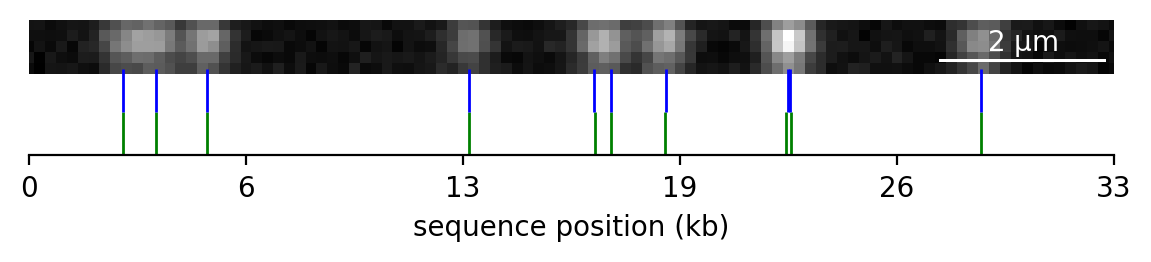

In [8]:
_, axs = pyplot.subplots(figsize=(7, 4), dpi=200, nrows=1)
# pyplot.sca(axs[1])

image = data_item.image[0]
labeled_pos = data_item.labeled_coords.T[1]

pyplot.imshow(image, cmap="gray")
pyplot.eventplot([inference_item.loc_pred, labeled_pos], lineoffsets=[-6, -2], colors=["g", "b"], linewidths=1, linelengths=4)

set_only_x_visible()
set_formatter(lambda x, _: int((x * data_item.scale) / 1000))
pyplot.gca().invert_yaxis()
pyplot.gca().add_artist(ScaleBar(scalebar_scale, color="w", box_alpha=0, scale_loc="top", location="upper right", width_fraction=.02, sep=0))
pyplot.xlabel("sequence position (kb)")
pyplot.xlim(0, 100)
pyplot.ylim(-8, None)

for ext in [".pdf", ".jpg"]:
    pyplot.savefig(Path("../../DeepOM-Paper/figures") / ("simulation_figure" + ext), bbox_inches='tight')